# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_by_city = pyber_data_df.groupby('type').count().ride_id
rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_count = city_data_df.groupby(["type"]).sum().driver_count
drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3.Get the total amount of fares for each city type
total_fares_per_city = pyber_data_df.groupby(["type"]).sum().fare
total_fares_per_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = pyber_data_df.groupby(["type"]).mean().fare
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare = pyber_data_df.groupby(['type']).sum()["fare"] / drivers_count
average_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
             'Total Rides':rides_by_city,
             'Total Drivers':drivers_count,
             'Total Fares':total_fares_per_city,
             'Average Fare per Ride':average_fare_per_ride,
             'Average Fare per Driver':average_fare})
            
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_dates_count

date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_dates_count = type_dates_count.reset_index()
type_dates_count.head

<bound method NDFrame.head of                 date      type   fare
0      1/1/2019 0:08     Urban  37.91
1      1/1/2019 0:46  Suburban  47.74
2     1/1/2019 12:32  Suburban  25.56
3     1/1/2019 14:40     Urban   5.42
4     1/1/2019 14:42     Urban  12.31
...              ...       ...    ...
2359   5/8/2019 1:54     Urban  32.69
2360   5/8/2019 2:31     Urban  41.33
2361   5/8/2019 4:20     Urban  21.99
2362   5/8/2019 4:39     Urban  18.45
2363   5/8/2019 7:29     Urban  18.55

[2364 rows x 3 columns]>

In [54]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_ride_data_df = pd.pivot_table(type_dates_count, values='fare', index = 'date', columns ='type')
pyber_ride_data_df.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [91]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Pyber_ride_data = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
Pyber_ride_data.head(10)

type,Rural,Suburban,Urban
date,,,


In [92]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
loc_pyber_pivot_table.index = pd.to_datetime(loc_pyber_pivottable.index)

In [93]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 108.0+ bytes


In [87]:
jan_april_2019_df = pyber_ride_data_df
jan_april_2019_df.index = pd.to_datetime(jan_april_2019_df.index)

In [94]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Pyber_ride_data_df=jan_april_2019_df.resample('W').sum()
Pyber_ride_data_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


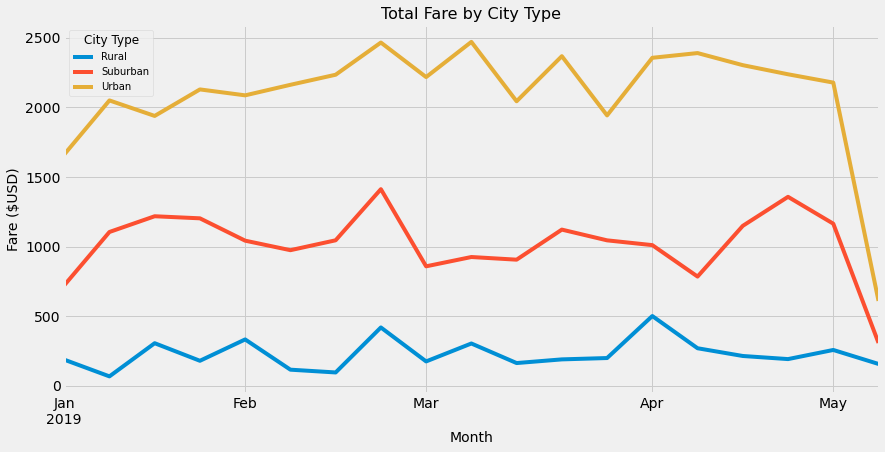

In [116]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
Pyber_ride_data_df.plot(figsize=(13,7),)
plt.gcf().subplots_adjust(bottom=0.15)

# Add graph properties
plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=14)
plt.xlabel("Month", fontsize=14)

# Create a legend
lgnd = plt.legend(fontsize="10", loc="best", title="City Type")
lgnd.get_title().set_fontsize(12)

# Save figure
plt.savefig("Analysis/Fig8.png")

# Show figure
plt.show()
